## Importation des bibliothèques 

In [96]:
import pandas as pd              #analyse de donnees
import numpy as np               #manipulation de tableaux ou calcul mathematiques
import seaborn as sns            #visualisation de donnees
import matplotlib.pyplot as plt  #visualisation les données
import scipy
#import statsmodels.api as sm
import pygal
import pycountry
import warnings
import folium
from folium.plugins import HeatMap
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Téléchargement et nettoyage du df

In [97]:
data=pd.read_csv("worldHappinessReport.csv", index_col=0)
data

,Country,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment,Region
1,Afghanistan,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,Southern Asia
2,Albania,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,Central and Eastern Europe
3,Algeria,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,NaN,Middle East and Northern Africa
4,Argentina,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430,Latin America and Caribbean
5,Armenia,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,Central and Eastern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Venezuela,5.070751,9.439296,0.895879,66.300003,0.635505,-0.206035,0.843969,0.725643,0.362985,0.241124,Latin America and Caribbean
144,Vietnam,5.175279,8.727759,NaN,67.699997,NaN,NaN,NaN,NaN,NaN,NaN,Southeastern Asia
145,Yemen,3.253560,NaN,0.789555,55.900002,0.595191,NaN,NaN,0.455182,0.295064,0.247787,Middle East and Northern Africa
146,Zambia,3.932777,8.213179,0.743754,54.799999,0.823169,0.128904,0.739541,0.684623,0.387189,0.717004,Sub-Saharan Africa


In [144]:
data.isna().sum()

Country                    0
Happiness                  0
GDP                        4
SocialSupport              1
Health                     2
Freedom                    1
Generosity                 5
Corruption                11
PositiveAffect             1
NegativeAffect             1
ConfidenceInGovernment    13
Region                     0
dtype: int64

In [4]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#Trouvons les outliers la mesure stat de dispersion
#en calculant la difference entre le 3e et 1er quartile

Happiness                  1.632150
GDP                        1.822045
SocialSupport              0.171764
Health                    10.200001
Freedom                    0.171063
Generosity                 0.238703
Corruption                 0.179053
PositiveAffect             0.178742
NegativeAffect             0.123898
ConfidenceInGovernment     0.297223
dtype: float64


In [5]:
print(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

     ConfidenceInGovernment  Corruption  Country  Freedom    GDP  Generosity  \
1                     False       False    False     True  False       False   
2                     False       False    False    False  False       False   
3                     False       False    False     True  False       False   
4                     False       False    False    False  False       False   
5                     False       False    False    False  False       False   
..                      ...         ...      ...      ...    ...         ...   
143                   False       False    False    False  False       False   
144                   False       False    False    False  False       False   
145                   False       False    False    False  False       False   
146                   False       False    False    False  False       False   
147                   False       False    False    False  False       False   

     Happiness  Health  NegativeAffect 

<ipython-input-5-2076455c051a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
<ipython-input-5-2076455c051a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
#Toutes les valeurs True indiquent la presence d'outliers 
#et les valeurs False indiquent que leur contenu est correct

In [6]:
#Retirons les outliers du df
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

<ipython-input-6-90952e6a99f1>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


(125, 12)

In [44]:
#Remplacons les valeurs manquantes par la moyenne 
#A faire ssi la distribution n'est pas skewed
#data = data.fillna(data_brute.mean())

In [98]:
#Ou remplacons les valeurs manquantes par la mediane
#A utiliser si distribution skewed
data = data.fillna(data.median())

In [9]:
data.isna().sum() #on s'assure que toutes les valeurs manquantes ont été remplacées (par la moyenne ou le mode)

Country                   0
Happiness                 0
GDP                       0
SocialSupport             0
Health                    0
Freedom                   0
Generosity                0
Corruption                0
PositiveAffect            0
NegativeAffect            0
ConfidenceInGovernment    0
Region                    0
dtype: int64

In [150]:
data

,Country,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment,Region
1,Albania,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,Central and Eastern Europe
3,Argentina,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430,Latin America and Caribbean
4,Armenia,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,Central and Eastern Europe
5,Australia,7.257038,10.706581,0.949958,73.300003,0.910550,0.308773,0.411347,0.780079,0.225361,0.453407,Australia and New Zealand
6,Austria,7.293728,10.724075,0.906218,72.699997,0.890031,0.131114,0.518304,0.747569,0.180269,0.435908,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Venezuela,5.070751,9.439296,0.895879,66.300003,0.635505,-0.206035,0.843969,0.725643,0.362985,0.241124,Latin America and Caribbean
143,Vietnam,5.175279,8.727759,0.828646,67.699997,0.812530,-0.030673,0.782116,0.720716,0.279024,0.481682,Southeastern Asia
144,Yemen,3.253560,9.492126,0.789555,55.900002,0.595191,-0.030673,0.782116,0.455182,0.295064,0.247787,Middle East and Northern Africa
145,Zambia,3.932777,8.213179,0.743754,54.799999,0.823169,0.128904,0.739541,0.684623,0.387189,0.717004,Sub-Saharan Africa


<ipython-input-47-6e4a58d8007b>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


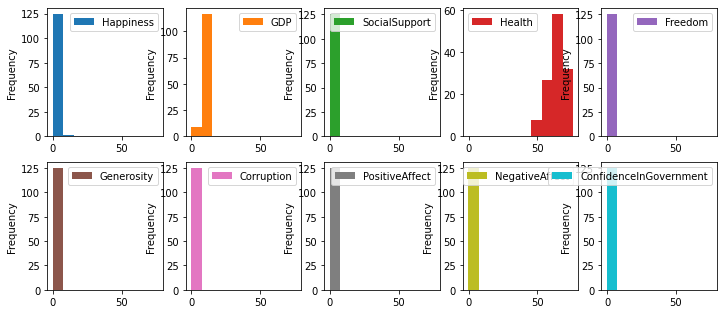

In [47]:
data.plot(kind='hist', subplots=True, layout=(3,5), sharex=False, figsize=(12,8))
plt.show()

In [10]:
def monanalyse(data):
    e=1e-10
    stat=pd.DataFrame()
    dfnum = data.select_dtypes(include=['float64','int64'])
    stat=dfnum.describe().T
    stat["var"]=dfnum.var()
    stat["erreur_type"]=stat["std"]/np.sqrt(dfnum.shape[0])
    stat["skewness"]=dfnum.skew()-0
    stat["kurtosis"]=dfnum.kurtosis()-3
    stat["taux_dispersion_avec_moyen"]=stat["std"]/stat["mean"]*100
    stat["taux_dispersion_avec_median"]=(stat["75%"]-stat["25%"])/(stat["50%"]+e)*100

    stat["outmax"]=stat["75%"]+1.5*(stat["75%"]-stat["25%"])  #Q3+1.5*IQR
    stat["outmin"]=stat["25%"]-1.5*(stat["75%"]-stat["25%"])  #Q1-1.5*IQR
    
    stat["taux_outliers"]=((dfnum>stat["75%"]+1.5*(stat["75%"]-stat["25%"]))
                       | (dfnum<stat["25%"]-1.5*(stat["75%"]-stat["25%"]))).sum()/dfnum.shape[0]*100
    stat["taux_manquante"]=dfnum.isna().sum()/dfnum.shape[0]*100

    stat["unique"]=dfnum.nunique()#/dfnum.shape[0]*100
    return stat

In [11]:
monanalyse(data)

,count,mean,std,min,25%,50%,75%,max,var,erreur_type,skewness,kurtosis,taux_dispersion_avec_moyen,taux_dispersion_avec_median,outmax,outmin,taux_outliers,taux_manquante,unique
Happiness,125.0,5.413383,0.992658,3.253560,4.628133,5.552915,6.174118,7.476214,0.985369,0.088786,-0.074428,-3.741960,18.337101,27.840958,8.493095,2.309156,0.0,0.0,125
GDP,125.0,9.231566,1.109521,6.623784,8.493189,9.414567,10.117225,11.116818,1.231036,0.099239,-0.478923,-3.636252,12.018768,17.250245,12.553278,6.057135,0.0,0.0,123
SocialSupport,125.0,0.810045,0.103023,0.507805,0.739956,0.828646,0.900256,0.966753,0.010614,0.009215,-0.677035,-3.398692,12.718149,19.344774,1.140705,0.499507,0.0,0.0,125
Health,125.0,64.055093,6.493227,47.299999,59.200001,65.800003,68.300003,75.907318,42.161999,0.580772,-0.576692,-3.383881,10.136941,13.829790,81.950006,45.549997,0.0,0.0,98
Freedom,125.0,0.779725,0.110614,0.477957,0.715822,0.805449,0.859390,0.985178,0.012235,0.009894,-0.605741,-3.176957,14.186279,17.824538,1.074741,0.500471,1.6,0.0,125
Generosity,125.0,-0.027965,0.136878,-0.253493,-0.146240,-0.039014,0.078604,0.380741,0.018736,0.012243,0.510396,-3.275699,-489.461917,-576.316786,0.415869,-0.483506,0.0,0.0,121
Corruption,125.0,0.774102,0.112907,0.411347,0.727451,0.797619,0.851206,0.936764,0.012748,0.010099,-1.350058,-1.014839,14.585489,15.515570,1.036839,0.541819,4.8,0.0,115
PositiveAffect,125.0,0.700828,0.106026,0.420962,0.615110,0.712438,0.786368,0.902772,0.011241,0.009483,-0.309113,-3.566881,15.128652,24.038295,1.043254,0.358223,0.0,0.0,125
NegativeAffect,125.0,0.288290,0.077227,0.114123,0.231598,0.279024,0.340622,0.495040,0.005964,0.006907,0.323056,-3.488600,26.787861,39.073251,0.504157,0.068062,0.0,0.0,125
ConfidenceInGovernment,125.0,0.476844,0.187038,0.110937,0.341680,0.453407,0.590425,0.964690,0.034983,0.016729,0.467795,-3.253336,39.224063,54.861336,0.963543,-0.031438,0.8,0.0,113


## A- REPORTING

In [273]:
def reporting(df):
#https://github.com/pandas-profiling/pandas-profiling
#Exploratory Data Analysis 
#https://www.datacorner.fr/pandas-profiling/

    from pandas_profiling import ProfileReport
    resultats = df.profile_report(title='Pandas Profiling Report')
    resultats.to_file("report.html")
    return None
reporting(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## B- STATS UNIVARIEES

In [151]:
data.GDP.describe()

count    125.000000
mean       9.233428
std        1.109894
min        6.623784
25%        8.493189
50%        9.439296
75%       10.117225
max       11.116818
Name: GDP, dtype: float64

<AxesSubplot:>

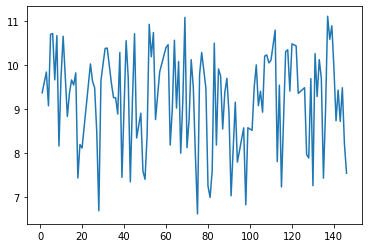

In [152]:
data.GDP.plot()

<AxesSubplot:>

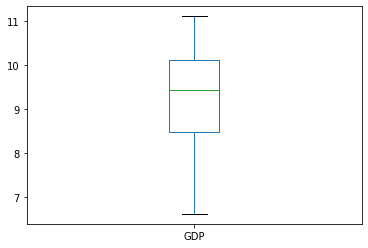

In [153]:
data.GDP.plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

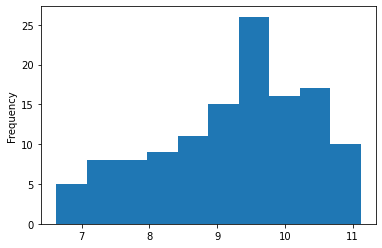

In [154]:
data.GDP.plot(kind="hist")

In [155]:
#Moyenne des GDP
data.GDP.mean()

9.233427860260011

In [156]:
#Intervalle de confiance de la moyenne en utilisant la loi normale
scipy.stats.norm.interval(alpha=0.95,loc=data.GDP.mean()) 

(7.2734638757199574, 11.193391844800065)

In [ ]:
##Conclusion: la moyenne des GDP est de 9.23, 
#par contre si on prend un echantillon, la moyenne sera comprise entre 7.27 et 11.19 à 95%.

In [244]:
top10_GDP =data.GDP.sort_values().head(10)
top10_GDP

75     6.623784
28     6.694727
98     6.830874
81     6.998548
91     7.035359
115    7.237275
80     7.255901
130    7.265299
43     7.353573
50     7.410451
Name: GDP, dtype: float64

In [263]:
data.groupby("Region").mean()["GDP"] #moyenne des GDP par region

Region
Australia and New Zealand          10.706581
Central and Eastern Europe          9.611540
Eastern Asia                       10.083773
Latin America and Caribbean         9.305069
Middle East and Northern Africa     9.924078
North America                      10.900906
Southeastern Asia                   8.865175
Southern Asia                       8.525054
Sub-Saharan Africa                  7.937773
Western Europe                     10.549453
Name: GDP, dtype: float64

In [265]:
g = data.groupby("Region").mean()["GDP"]

<AxesSubplot:xlabel='Region'>

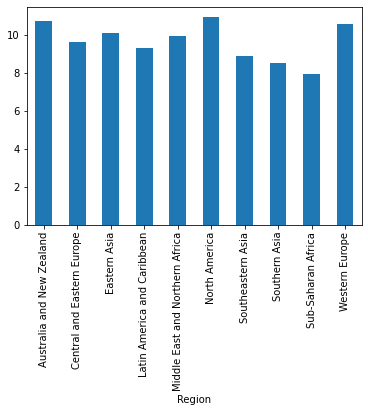

In [266]:
g.plot.bar()

In [157]:
data.skew()-0

Happiness                -0.074428
GDP                      -0.483345
SocialSupport            -0.677035
Health                   -0.577828
Freedom                  -0.606944
Generosity                0.504622
Corruption               -1.321158
PositiveAffect           -0.310887
NegativeAffect            0.323056
ConfidenceInGovernment    0.424877
dtype: float64

In [ ]:
# Corruption est asymetrique vers la gauche
# Generosity est la plus asymétrique 

In [158]:
data.kurtosis()-3

Happiness                -3.741960
GDP                      -3.636142
SocialSupport            -3.398692
Health                   -3.384175
Freedom                  -3.177215
Generosity               -3.278662
Corruption               -1.045901
PositiveAffect           -3.567008
NegativeAffect           -3.488600
ConfidenceInGovernment   -3.270756
dtype: float64

In [ ]:
#PositiveAffect est la valeur la plus aplatie
#SocialSupport est la valeur la plus pointue

In [159]:
#Test de shapiro
scipy.stats.shapiro(data.GDP)

ShapiroResult(statistic=0.9603224396705627, pvalue=0.0010153214680030942)

In [19]:
#pvalue<0.05, GDP ne suit donc pas la loi normale

#### Stats Univariees automatisées

KeyError: "None of [Float64Index([  9.376145362854, 9.84870910644531, 9.08109474182129,\n              10.7065811157227, 10.7240753173828, 9.67076206207275,\n              10.6756935119629,  8.1673469543457, 9.75080013275146,\n              10.6609840393066,\n              ...\n              11.1168184280396,  10.590446472168, 10.9009056091309,\n              9.93068504333496,  8.7408332824707, 9.43929576873779,\n              8.72775936126709, 9.41456651687622, 8.21317863464355,\n               7.5494909286499],\n             dtype='float64', length=125)] are in the [columns]"

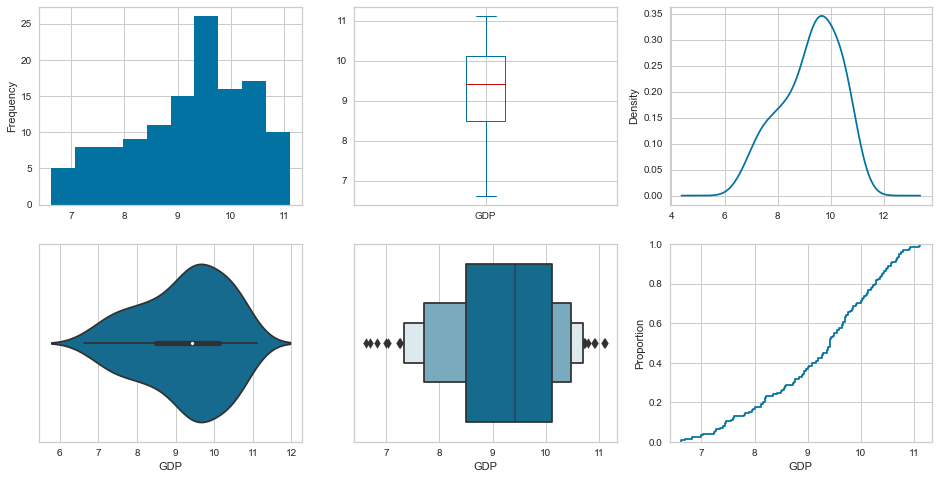

In [40]:
def plot_univarie_quantitative(df, col):
    fig, st_axis = plt.subplots(2, 3, figsize=(16,8))
    #plt.title("Eboulis des valeurs propres")

    df.GDP.plot(kind="hist",ax = st_axis[0,0])
    df.GDP.plot(kind="box",ax = st_axis[0,1])
    df.GDP.plot(kind="density",ax = st_axis[0,2])

    sns.violinplot(x=col,data=df,ax = st_axis[1,0])
    sns.boxenplot(x=col,data=df,ax = st_axis[1,1])
    sns.ecdfplot(x=col, data=df, complementary=False, ax = st_axis[1,2])
    print(monanalyse(df).T[col])
    #ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    #ts_ax.set_title('essai')

    return None
plot_univarie_quantitative(data, data.GDP)

## C- STATS GENERALES ET INFERENTIELLES

# Étudiez les associations entre variables catégorielles (visualisation et test)

In [81]:
data.Region.value_counts()

Sub-Saharan Africa                 31
Central and Eastern Europe         29
Latin America and Caribbean        21
Middle East and Northern Africa    15
Western Europe                     11
Eastern Asia                        6
Southern Asia                       5
Southeastern Asia                   5
North America                       1
Australia and New Zealand           1
Name: Region, dtype: int64

In [87]:
t=pd.crosstab(data.Country, data.Region) #creation d'un tab de contingence
t

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Country,,,,,,,,,,
Albania,0,1,0,0,0,0,0,0,0,0
Argentina,0,0,0,1,0,0,0,0,0,0
Armenia,0,1,0,0,0,0,0,0,0,0
Australia,1,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,1,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,1,0,0,0
Yemen,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='Country'>

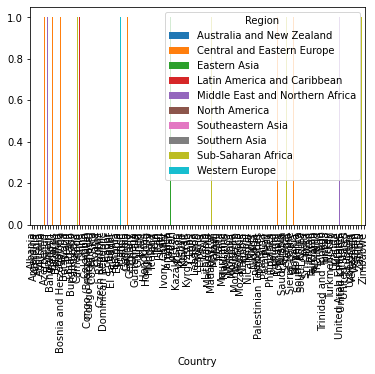

In [182]:
t.plot.bar()

<AxesSubplot:xlabel='Country'>

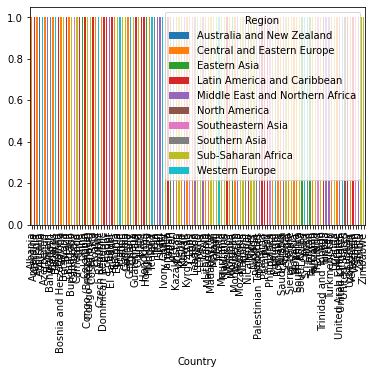

In [92]:
t=pd.crosstab(data.Country, data.Region)
t.plot.bar(stacked=True)

In [93]:
tab=pd.crosstab(data.Country, data.Region,normalize = "columns")*100
tab

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Country,,,,,,,,,,
Albania,0.0,3.448276,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Argentina,0.0,0.000000,0.0,4.761905,0.000000,0.0,0.0,0.0,0.000000,0.000000
Armenia,0.0,3.448276,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Australia,100.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Austria,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.090909
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.000000,0.0,4.761905,0.000000,0.0,0.0,0.0,0.000000,0.000000
Vietnam,0.0,0.000000,0.0,0.000000,0.000000,0.0,20.0,0.0,0.000000,0.000000
Yemen,0.0,0.000000,0.0,0.000000,6.666667,0.0,0.0,0.0,0.000000,0.000000


In [94]:
sqtab = sm.stats.SquareTable(tab)
sqtab.summary()

,Statistic,P-value,DF
Symmetry,836.253,1.000,9045
Homogeneity,437.005,0.000,134


In [ ]:
#au seuil de 95% (pvalue<5%), il y a une dependance entre Country et Region

# Étudiez les associations entre les variables quantitatives et les variables catégorielles

In [ ]:
#Etudions Happiness en fonction des Regions

<AxesSubplot:xlabel='Happiness', ylabel='Region'>

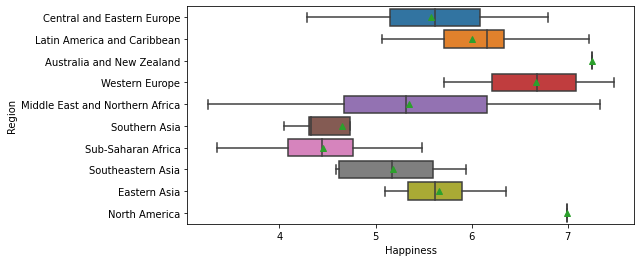

In [95]:
fig, ax = plt.subplots(figsize=(8,4))  #1 inch = 2,54 centimètres

sns.boxplot(x='Happiness',y="Region",showmeans=True,showfliers=False,data=data)

In [135]:
#A cette etape, on ne peut pas affirmer qu'il y a une dependance entre Happiness 
#et Region, il faudra analyser et faire des tests

In [96]:
data.groupby("Region").describe()["Happiness"]

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,1.0,7.257038,NaN,7.257038,7.257038,7.257038,7.257038,7.257038
Central and Eastern Europe,29.0,5.579568,0.652803,4.287736,5.152279,5.614799,6.089905,6.789568
Eastern Asia,6.0,5.656567,0.470594,5.099061,5.341007,5.618181,5.901479,6.359451
Latin America and Caribbean,21.0,6.002161,0.667449,3.823866,5.713295,6.157342,6.336010,7.225182
Middle East and Northern Africa,15.0,5.344453,1.143877,3.253560,4.672458,5.312483,6.160613,7.331036
North America,1.0,6.991759,NaN,6.991759,6.991759,6.991759,6.991759,6.991759
Southeastern Asia,5.0,5.183485,0.593847,4.585842,4.623141,5.175279,5.594270,5.938895
Southern Asia,5.0,4.650878,0.704308,4.046111,4.309771,4.330945,4.736692,5.830871
Sub-Saharan Africa,31.0,4.448511,0.619512,3.347121,4.084091,4.441306,4.762117,6.174118


In [99]:
data.groupby("Region").mean()["Happiness"].sort_values()#regardons la moyenne des Happiness

Region
Sub-Saharan Africa                 4.448511
Southern Asia                      4.650878
Southeastern Asia                  5.183485
Middle East and Northern Africa    5.344453
Central and Eastern Europe         5.579568
Eastern Asia                       5.656567
Latin America and Caribbean        6.002161
Western Europe                     6.671761
North America                      6.991759
Australia and New Zealand          7.257038
Name: Happiness, dtype: float64

In [101]:
data.groupby("Region").sum()["Happiness"]/data.Happiness.sum()*100 

Region
Australia and New Zealand           1.072459
Central and Eastern Europe         23.912213
Eastern Asia                        5.015629
Latin America and Caribbean        18.627227
Middle East and Northern Africa    11.847201
North America                       1.033255
Southeastern Asia                   3.830126
Southern Asia                       3.436578
Sub-Saharan Africa                 20.379692
Western Europe                     10.845620
Name: Happiness, dtype: float64

<AxesSubplot:ylabel='Region'>

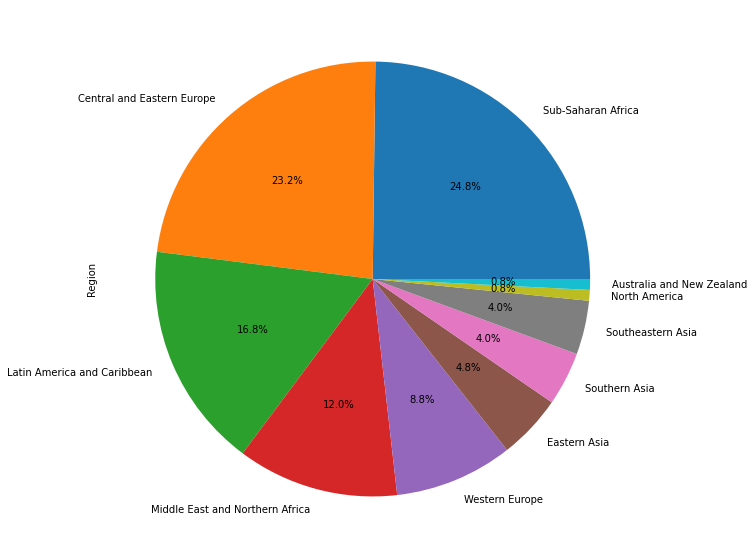

In [108]:
fig, ax = plt.subplots(figsize=(10,10))

data.Region.value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:xlabel='Region', ylabel='Happiness'>

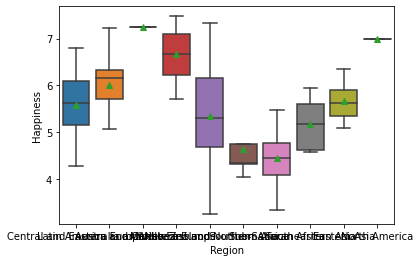

In [123]:
sns.boxplot(y='Happiness',x="Region",showmeans=True,showfliers=False,data=data)

<AxesSubplot:xlabel='Region', ylabel='Happiness'>

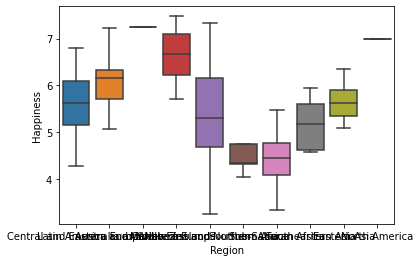

In [124]:
sns.boxplot(x="Region", y="Happiness", showfliers=False,
            data=data)

<AxesSubplot:xlabel='Region', ylabel='Happiness'>

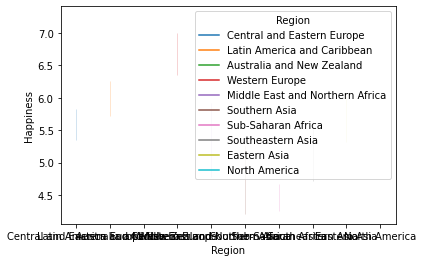

In [125]:
sns.lineplot(x="Region", y="Happiness",
             hue="Region", 
             data=data)

<AxesSubplot:xlabel='Region', ylabel='Happiness'>

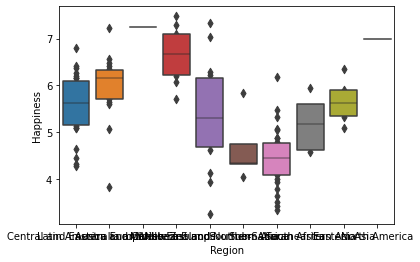

In [126]:
sns.boxenplot(x="Region", y="Happiness",
              scale="linear", data=data)

<AxesSubplot:xlabel='Region', ylabel='Happiness'>

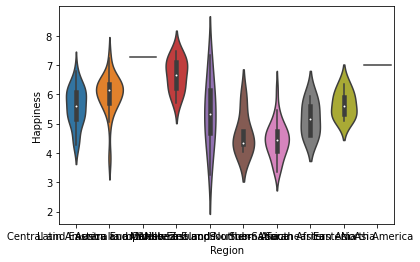

In [128]:
sns.violinplot(x="Region", y="Happiness", data=data)

In [131]:
# Ordinary Least Squares (OLS) model
from statsmodels.formula.api import ols
model = ols('Happiness ~Region', data=data).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

#si p-value(PR(>F))<0.05 (seuil de moralite) alors il y a dependance entre les deux variables 
#sinon elles sont indépendantes 

,df,sum_sq,mean_sq,F,PR(>F)
Region,9.0,63.847503,7.094167,13.984465,5.338334e-15
Residual,115.0,58.338248,0.507289,NaN,NaN


In [134]:
5.338334e-15<0.05
#p-value(PR(>F))<0.05 donc il y a bien dependance entre les deux variables

True

# Étudiez les différentes variables catégorielles : fréquences, proportions, graphiques.

In [219]:
def analyse_quali (dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("")
    print(dataframe[col_name].describe())
    fig, ax = plt.subplots(figsize=(10,10))
    dataframe[col_name].value_counts().plot(kind="pie", autopct='%1.2f%%')

                                 Region  Ratio
Sub-Saharan Africa                   31   24.8
Central and Eastern Europe           29   23.2
Latin America and Caribbean          21   16.8
Middle East and Northern Africa      15   12.0
Western Europe                       11    8.8
Eastern Asia                          6    4.8
Southern Asia                         5    4.0
Southeastern Asia                     5    4.0
North America                         1    0.8
Australia and New Zealand             1    0.8

count                    125
unique                    10
top       Sub-Saharan Africa
freq                      31
Name: Region, dtype: object


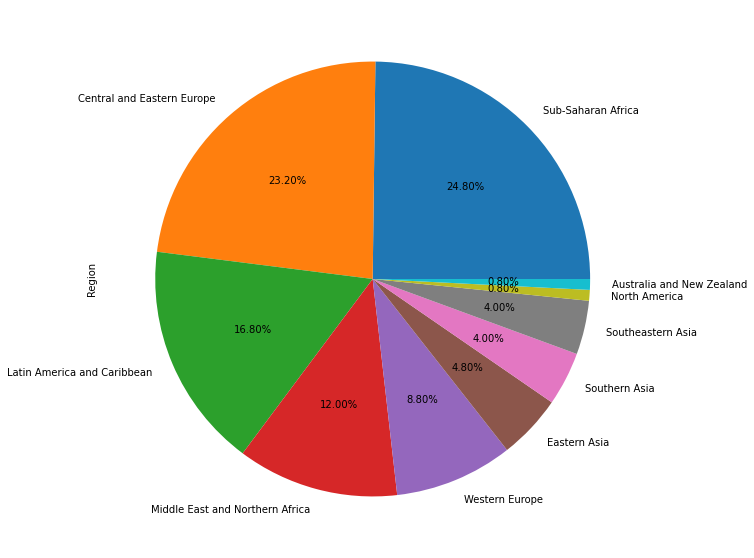

In [220]:
analyse_quali(data, "Region")

# Étudiez les associations entre variables quantitatives (visualisation et test)

In [ ]:
#Etudion corruption et freedom

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

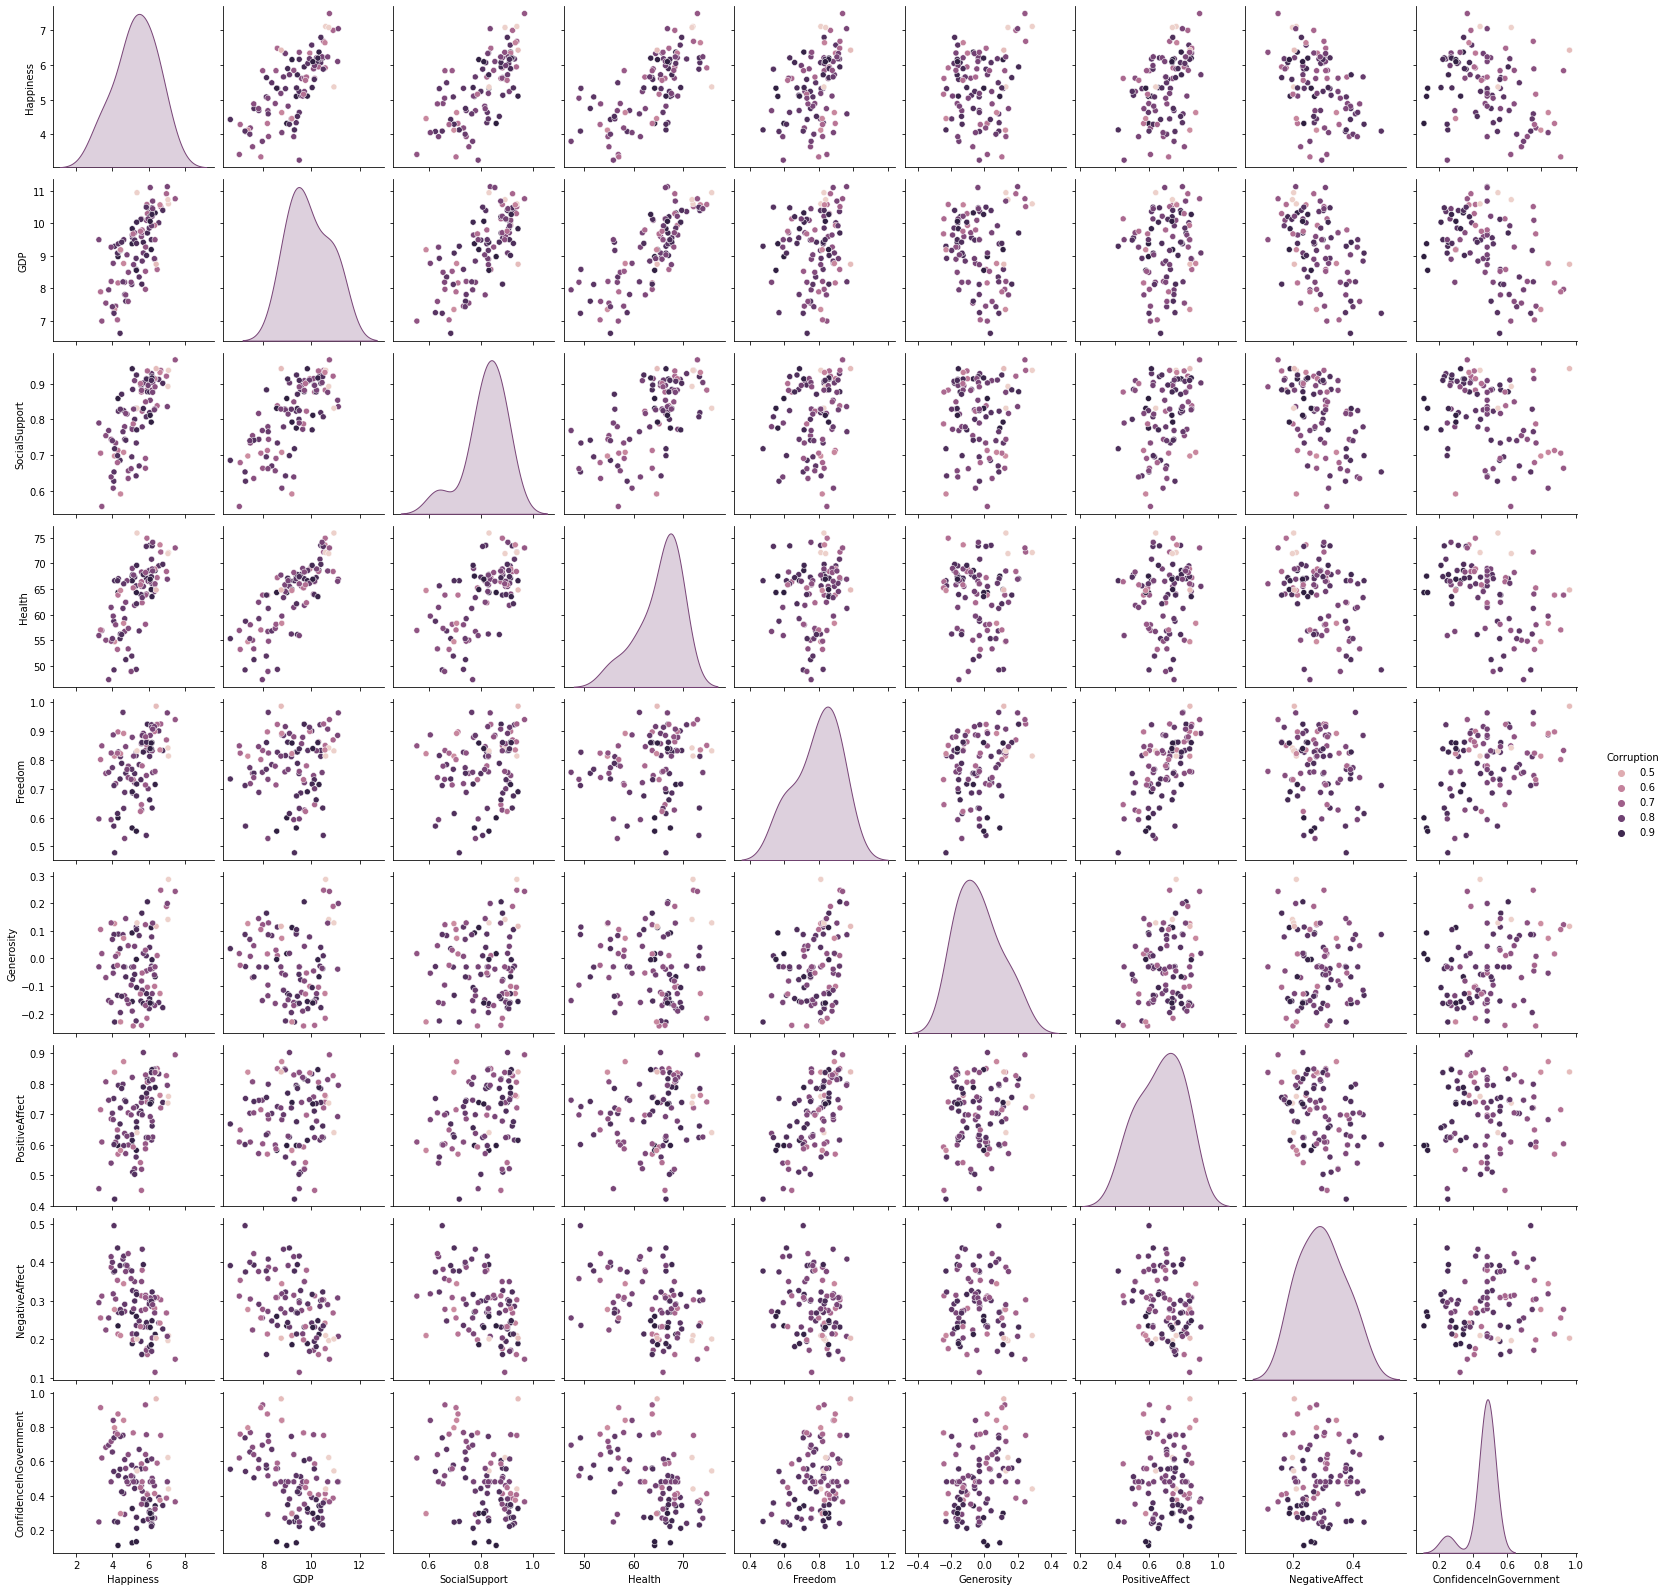

In [162]:
sns.pairplot(data.sample(100), hue='Corruption')

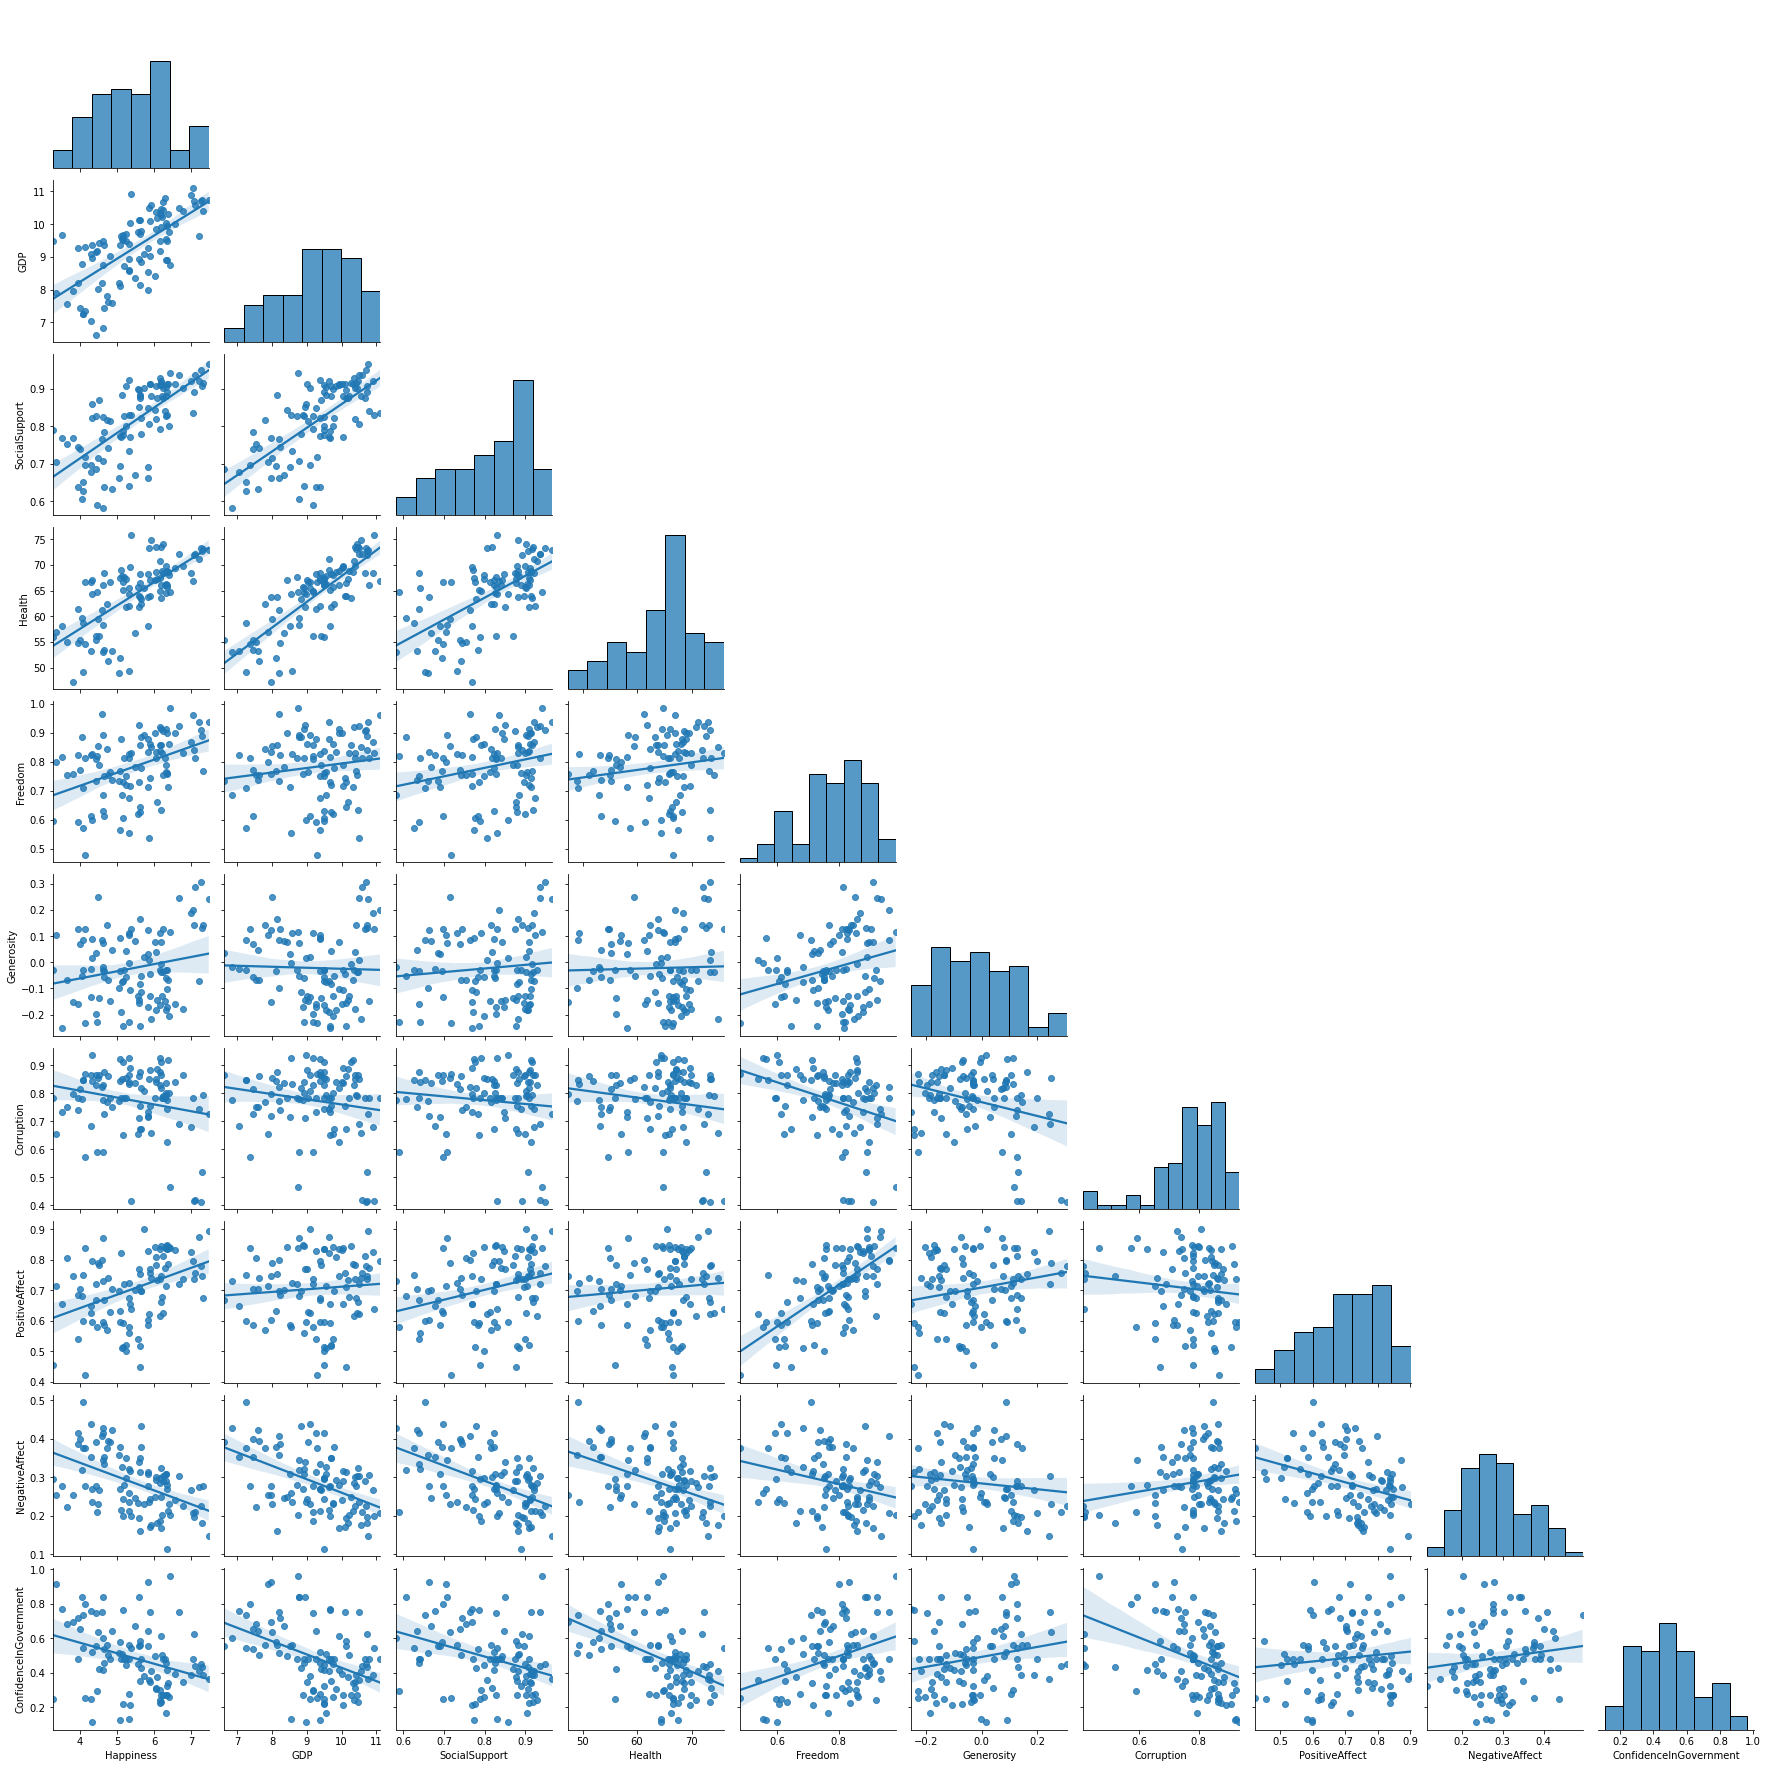

In [164]:
sns.pairplot(data.select_dtypes(exclude=['object',"category"]).dropna().sample(100), kind="reg", corner=True)

In [165]:
data.corr()

,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment
Happiness,1.000000,0.698551,0.713665,0.710324,0.437847,0.105592,-0.184819,0.448441,-0.469893,-0.316184
GDP,0.698551,1.000000,0.726078,0.809061,0.210688,-0.112933,-0.115401,0.161182,-0.463649,-0.422619
SocialSupport,0.713665,0.726078,1.000000,0.663210,0.267544,-0.023612,-0.059351,0.332148,-0.527248,-0.342938
Health,0.710324,0.809061,0.663210,1.000000,0.240580,-0.028431,-0.134738,0.178564,-0.435870,-0.429108
Freedom,0.437847,0.210688,0.267544,0.240580,1.000000,0.192522,-0.290987,0.640944,-0.277480,0.352715
Generosity,0.105592,-0.112933,-0.023612,-0.028431,0.192522,1.000000,-0.305567,0.163807,-0.086103,0.255734
Corruption,-0.184819,-0.115401,-0.059351,-0.134738,-0.290987,-0.305567,1.000000,-0.112805,0.186020,-0.399864
PositiveAffect,0.448441,0.161182,0.332148,0.178564,0.640944,0.163807,-0.112805,1.000000,-0.316734,0.081738
NegativeAffect,-0.469893,-0.463649,-0.527248,-0.435870,-0.277480,-0.086103,0.186020,-0.316734,1.000000,0.090260
ConfidenceInGovernment,-0.316184,-0.422619,-0.342938,-0.429108,0.352715,0.255734,-0.399864,0.081738,0.090260,1.000000


<AxesSubplot:>

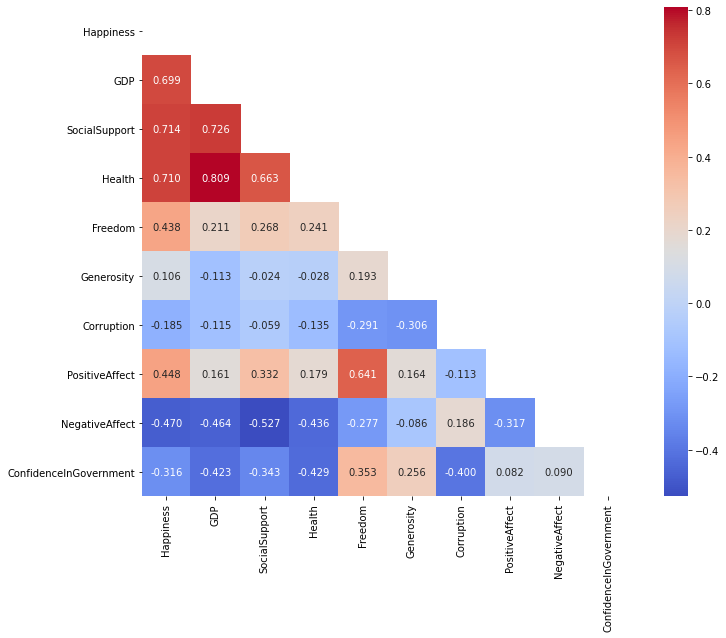

In [166]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask,annot=True,fmt="1.3f",cmap='coolwarm')

<Figure size 576x576 with 0 Axes>

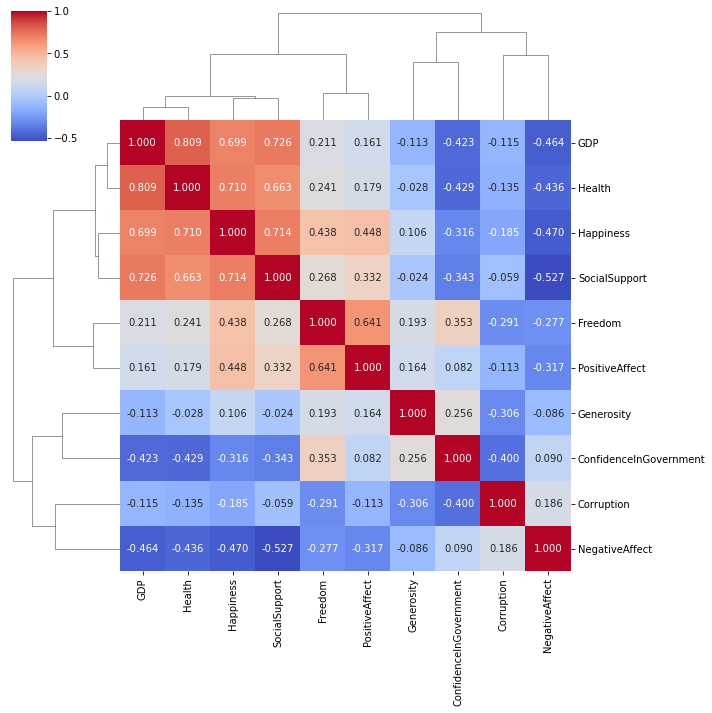

In [168]:
#H clustermap
def clustermap(df):
    df_num=df.select_dtypes(exclude=['object'])
    plt.figure(figsize=(8, 8))
    sns.clustermap(df_num.corr(),annot=True,fmt="1.3f",cmap='coolwarm')
    return None
clustermap(data)

<AxesSubplot:title={'center':'Corruption en fonction de Freedom'}, xlabel='Freedom', ylabel='Corruption'>

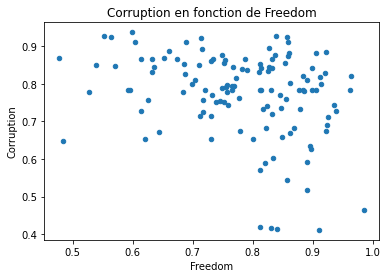

In [167]:
data.plot.scatter(x="Freedom", y="Corruption", title="Corruption en fonction de Freedom") 

/Users/giovannicruisevigouroux/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


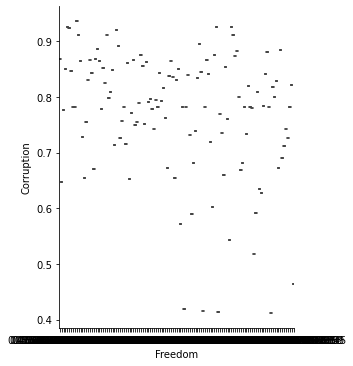

In [177]:
sns.factorplot(x = "Freedom", y = "Corruption", data = data, kind = "box")

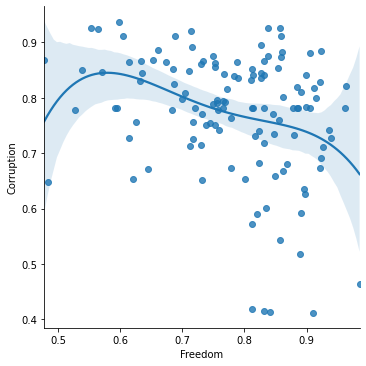

In [176]:
sns.lmplot(x="Freedom",y="Corruption",order=4,data=data)

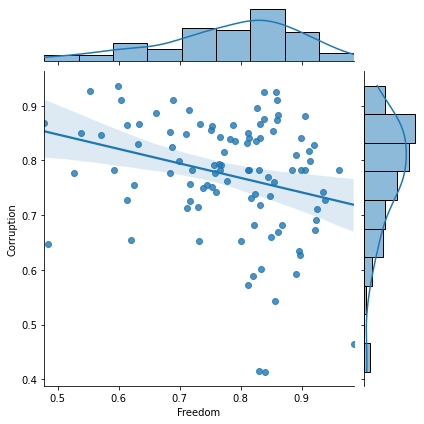

In [175]:
sns.jointplot(x="Freedom", y="Corruption", data=data.sample(100), kind="reg");

In [ ]:
#Le niveaau de corruption semble baisser en fonction de la liberté

In [169]:
#faisons un test statistique pour prendre une decision sur la dependance
scipy.stats.pearsonr(data.Corruption, data.Freedom)

(-0.290987225048829, 0.0009940882429644723)

In [ ]:
#conclusion: pvalue<5% il y a dependance lineaire entre les deux variables

In [170]:
scipy.stats.spearmanr(data.Corruption, data.Freedom)

SpearmanrResult(correlation=-0.2673776236865663, pvalue=0.0025746936012315293)

In [172]:
#pvalue = 0.0025746936012315293<0.05 donc il y a une dependance entre les deux variables

# Étudiez les différentes variables quantitatives : statistiques descriptives, graphiques.

In [230]:
def analyse_quanti(df,col):
    print("Statistiques univariées: paramètres de tendance")
    print(df[col].describe())
    print()
    print("Statisques univariées: paramètres de forme")
    print()
    print("Symetrie : ", df[col].skew())
    print()
    print("Applatissement : ", df[col].kurtosis())
    print()
    print("Taux de dispersion : ",df[col].std()/df[col].mean()*100)
    print()
    #df[col].plot(kind='density')
    #df[col].plot(kind='box')
    df[col].plot(kind='hist')
    
    return None

Statistiques univariées: paramètres de tendance
count    125.000000
mean       0.772738
std        0.112706
min        0.411347
25%        0.727451
50%        0.783429
75%        0.851206
max        0.936764
Name: Corruption, dtype: float64

Statisques univariées: paramètres de forme

Symetrie :  -1.3211580172488953

Applatissement :  1.9540994111720837

Taux de dispersion :  14.585290566297951



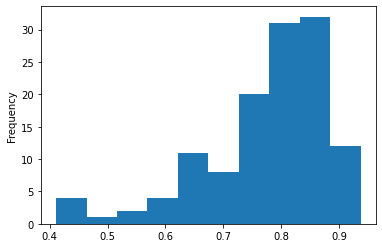

In [231]:
analyse_quanti(data,"Corruption")

Statistiques univariées: paramètres de tendance
count    125.000000
mean       0.810045
std        0.103023
min        0.507805
25%        0.739956
50%        0.828646
75%        0.900256
max        0.966753
Name: SocialSupport, dtype: float64

Statisques univariées: paramètres de forme

Symetrie :  -0.677035119263357

Applatissement :  -0.3986917130728318

Taux de dispersion :  12.718148738819037



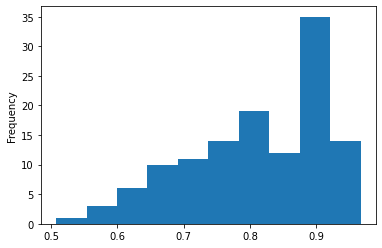

In [232]:
analyse_quanti(data,"SocialSupport")

Statistiques univariées: paramètres de tendance
count    125.000000
mean      64.058293
std        6.494143
min       47.299999
25%       59.200001
50%       66.000000
75%       68.300003
max       75.907318
Name: Health, dtype: float64

Statisques univariées: paramètres de forme

Symetrie :  -0.5778281034783729

Applatissement :  -0.3841754874213943

Taux de dispersion :  10.137864379918891



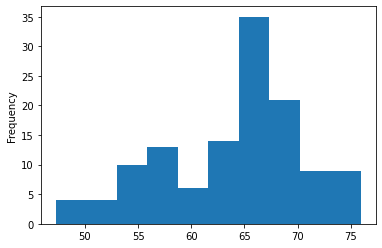

In [233]:
analyse_quanti(data,"Health")

## D- MODELE DE REGRESSION

In [58]:
data.corr()

,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment
Happiness,1.000000,0.701827,0.714195,0.710477,0.438561,0.102421,-0.183074,0.448789,-0.470224,-0.315436
GDP,0.701827,1.000000,0.726428,0.810803,0.216445,-0.113240,-0.142602,0.164683,-0.463816,-0.412929
SocialSupport,0.714195,0.726428,1.000000,0.660654,0.267234,-0.022611,-0.063079,0.331945,-0.527179,-0.344466
Health,0.710477,0.810803,0.660654,1.000000,0.242944,-0.029231,-0.143296,0.177358,-0.434140,-0.423803
Freedom,0.438561,0.216445,0.267234,0.242944,1.000000,0.188158,-0.294981,0.640812,-0.277302,0.354765
Generosity,0.102421,-0.113240,-0.022611,-0.029231,0.188158,1.000000,-0.298737,0.161058,-0.086773,0.251509
Corruption,-0.183074,-0.142602,-0.063079,-0.143296,-0.294981,-0.298737,1.000000,-0.102143,0.180371,-0.396940
PositiveAffect,0.448789,0.164683,0.331945,0.177358,0.640812,0.161058,-0.102143,1.000000,-0.316600,0.080271
NegativeAffect,-0.470224,-0.463816,-0.527179,-0.434140,-0.277302,-0.086773,0.180371,-0.316600,1.000000,0.095381
ConfidenceInGovernment,-0.315436,-0.412929,-0.344466,-0.423803,0.354765,0.251509,-0.396940,0.080271,0.095381,1.000000


In [65]:
#Regression Simple : Prediction de Happiness par rapport à GDP
X=data[["GDP"]]   
y=data["Happiness"]              
X = sm.add_constant(X)       
model = sm.OLS(y, X).fit()   

# Print out the statistics
model.params

const   -0.383086
GDP      0.628087
dtype: float64

In [60]:
data["happiness_predict"] = model.predict(X) 

In [61]:
data.sample(100)

,Country,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment,Region,happiness_predict
66,Kazakhstan,5.882351,10.088122,0.914093,64.000000,0.745244,-0.045618,0.755251,0.756762,0.171486,0.755706,Central and Eastern Europe,5.953128
51,Honduras,6.019986,8.421078,0.843355,67.000000,0.898377,0.078604,0.783429,0.842201,0.248383,0.495585,Latin America and Caribbean,4.906079
61,Italy,6.198870,10.469372,0.919791,73.400002,0.632843,-0.037178,0.866668,0.661181,0.322846,0.230196,Western Europe,6.192585
4,Armenia,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,Central and Eastern Europe,5.320627
108,Portugal,5.711499,10.237703,0.899985,72.199997,0.905066,-0.177408,0.880971,0.649151,0.294273,0.501088,Western Europe,6.047077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Belarus,5.552915,9.750800,0.900256,65.800003,0.620979,-0.129173,0.654113,0.540906,0.232768,0.447916,Central and Eastern Europe,5.741260
81,Malawi,3.416863,6.998548,0.555423,56.900002,0.847921,0.017441,0.734637,0.608667,0.312088,0.620333,Sub-Saharan Africa,4.012608
127,Tajikistan,5.829234,7.971401,0.662693,63.799999,0.832002,0.122264,0.718337,0.602668,0.277725,0.929793,Central and Eastern Europe,4.623643
137,United Arab Emirates,7.039420,11.116818,0.835527,66.900002,0.962017,0.199403,0.729197,0.795035,0.207598,0.502155,Middle East and Northern Africa,6.599238


In [62]:
data[["GDP","Happiness"]].corr(method="pearson") #GDP et Happiness sont lineairement correlés(fortement) 

,GDP,Happiness
GDP,1.000000,0.701827
Happiness,0.701827,1.000000


In [63]:
data[["GDP","Happiness"]].corr(method="spearman") #GDP et Happiness sont lineairement correlés(fortement) 

,GDP,Happiness
GDP,1.000000,0.713983
Happiness,0.713983,1.000000


In [64]:
data_corr=pd.DataFrame()
data_corr["Happiness"]=data["Happiness"]
data_corr["GDP"]=data["GDP"]
data_corr["log(Happiness)"]=np.log(data["Happiness"])
data_corr["log(GDP)"]=np.log(data["GDP"])
data_corr.corr()

,Happiness,GDP,log(Happiness),log(GDP)
Happiness,1.000000,0.701827,0.994361,0.692008
GDP,0.701827,1.000000,0.692860,0.997775
log(Happiness),0.994361,0.692860,1.000000,0.685344
log(GDP),0.692008,0.997775,0.685344,1.000000


In [66]:
#Regression Multiple : Prediction de Happiness par rapport à "Health", "SocialSupport" et "Generosity"
X=data[["Health", "SocialSupport", "Generosity"]]   #
y=data["Happiness"]              #Happiness est la variable à predire
X = sm.add_constant(X)       
model = sm.OLS(y, X).fit()   

# Print out the statistics
model.params

const           -2.136889
Health           0.065260
SocialSupport    4.193400
Generosity       0.904347
dtype: float64

In [67]:
data["happiness_predict2"] = model.predict(X)

In [68]:
data.sample(100)

,Country,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment,Region,happiness_predict,happiness_predict2
119,South Africa,4.513655,9.416938,0.870313,56.099998,0.787428,-0.137357,0.864782,0.784801,0.268175,0.423274,Sub-Saharan Africa,5.531566,5.049574
146,Zimbabwe,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,Sub-Saharan Africa,4.358647,4.551870
72,Latvia,5.977818,10.129182,0.895099,66.500000,0.699520,-0.158590,0.798378,0.623313,0.231753,0.264001,Central and Eastern Europe,5.978917,5.813016
131,Trinidad and Tobago,6.191860,10.266848,0.916029,63.500000,0.859140,-0.004833,0.911336,0.846467,0.248099,0.272541,Latin America and Caribbean,6.065383,5.844055
137,United Arab Emirates,7.039420,11.116818,0.835527,66.900002,0.962017,0.199403,0.729197,0.795035,0.207598,0.502155,Middle East and Northern Africa,6.599238,5.913064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Kyrgyzstan,5.629537,8.129609,0.882587,63.799999,0.859390,0.164256,0.874494,0.755125,0.160438,0.561673,Central and Eastern Europe,4.723012,5.876310
130,Togo,4.360805,7.265299,0.507805,54.299999,0.716694,-0.042402,0.725520,0.614189,0.425824,0.484952,Sub-Saharan Africa,4.180151,3.497837
65,Jordan,4.808083,9.028518,0.814665,66.599998,0.766262,-0.150126,0.729197,0.627798,0.391505,0.502155,Middle East and Northern Africa,5.287604,5.489904
134,Turkmenistan,5.229149,9.704367,0.908455,61.799999,0.720399,0.043873,0.729197,0.520885,0.349628,0.502155,Central and Eastern Europe,5.712096,5.745397


In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     67.71
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           9.07e-26
Time:                        13:03:09   Log-Likelihood:                -114.36
No. Observations:                 125   AIC:                             236.7
Df Residuals:                     121   BIC:                             248.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.1369      0.556     -3.846      0.000      -3.237      -1.037
Health            0.0653      0.011      5.765      0.000       0.043       0.088
SocialSupport     4.1934      0.713      5.881      0.000       2.782       5.605
Generosity        0.9043      0.403      2.245      0.027       0.107       1.702
==============================================================================
Omnibus:                        1.002   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                1.057
Skew:                          -0.122   Prob(JB):                        0.590
Kurtosis:                       2.621   Cond. No.                         854.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## WorldMap sur la variable Happiness

In [16]:
pairs_sample = list(zip(list(data.Country), list(data.Happiness)))

In [68]:
map = folium.Map()
#HeatMap(pairs_sample).add_to(map)

'''folium.Choropleth(geo_data = data.Country, 
                  data = data, 
                  columns=['Country','Happiness'], 
                  key_on='feature.id', 
                  fill_color='RdYlBu', 
                  line_color='white',
                  line_weight=0,
                  legend_name= 'Happiness rate in the World').add_to(map)'''

map

# E- LOI DE PROBABILITÉ

In [267]:
#La variable happiness suit elle une loi normale ou exponentielle?
scipy.stats.shapiro(data.Happiness)

ShapiroResult(statistic=0.9817848205566406, pvalue=0.09050145745277405)

In [269]:
#pvalue=0.09050145745277405<5 donc Happiness suit bien la loi normale

In [272]:
#BONUS La variable happiness suit elle une loi khi2, fisher, student, gamma?

In [41]:
from scipy.stats import chisquare

In [42]:
chisquare(data.Happiness)

Power_divergenceResult(statistic=22.571052214225922, pvalue=1.0)

In [ ]:
#pvalue=1 donc Happiness ne suit pas la loi khi 2

In [45]:
from scipy import stats
#stats.ttest_ind(data.Happiness)

# F- MACHINE LEARNING

#### Standardisation

In [80]:
def pca_auto (df, n_comp):
    X = df.select_dtypes(include=['float64','int64'])
    X=X.drop_duplicates()
    
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    #Centrage et rédution
    X_scaled = StandardScaler().fit_transform(X)
    
    #Instanciation du PCA
    pca = PCA(n_comp).fit(X_scaled) #calcule PCA1,2, etc
    
    X_projected = pca.transform(X_scaled)
    
    #Principal components coefficients (depending on original features)
    df_pca = pd.DataFrame(pca.components_, 
                          index=['PC'+str(i+1) for i in range(n_comp)],
                         columns=X.columns).T
    
    #Plotting correlation coefficient X_projected
    import seaborn as sns
    heatmap = sns.heatmap(pd.DataFrame(X_projected).corr(), annot=True, fmt = '.3f',cmap='coolwarm')
    heatmap.set_title("Principal components coefficients", fontdict={'fontsize':18}, pad=16)
    plt.show()
    
    infopca=pd.DataFrame()
    infopca['Variables']=['PC'+str(i+1) for i in range(n_comp)]
    infopca['importance']=pca.explained_variance_ratio_*100
    infopca.plot(kind='bar')
    plt.show()
    
    #On regarde les correlationns entre les variables PCA et celles de depart
    #Plotting correlation coefficient X_projected
    import seaborn as sns
    heatmap = sns.heatmap(pd.DataFrame(X_projected).corr(), annot=True, fmt = '.3f',cmap='coolwarm')
    heatmap.set_title("Principal components coefficients", fontdict={'fontsize':18}, pad=16)
    plt.show()
    
    #Variances expliquées
    important_degres = pca.explained_variance_ratio_*100
    
    #Projection de l'éboulis des valeurs propres
    plt.figure(figsize=(12,8))
    plt.bar(np.arange(len(important_degres))+1, important_degres)
    plt.plot(np.arange(len(important_degres))+1, important_degres.cumsum(), c='red',marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

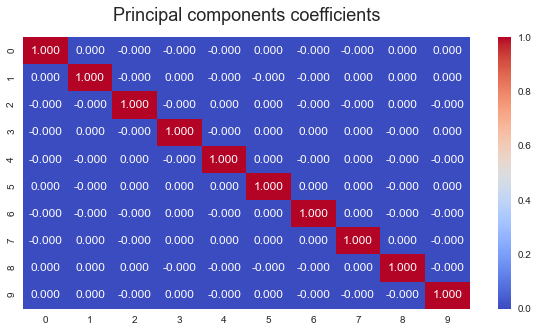

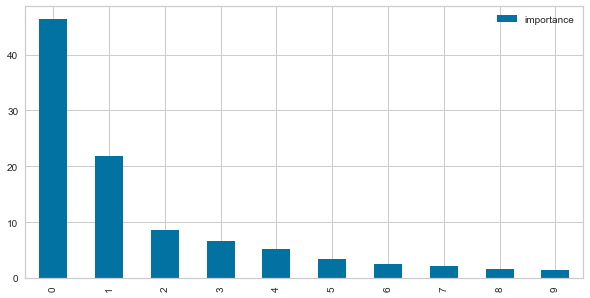

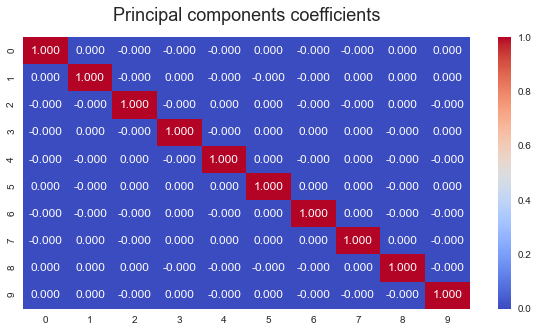

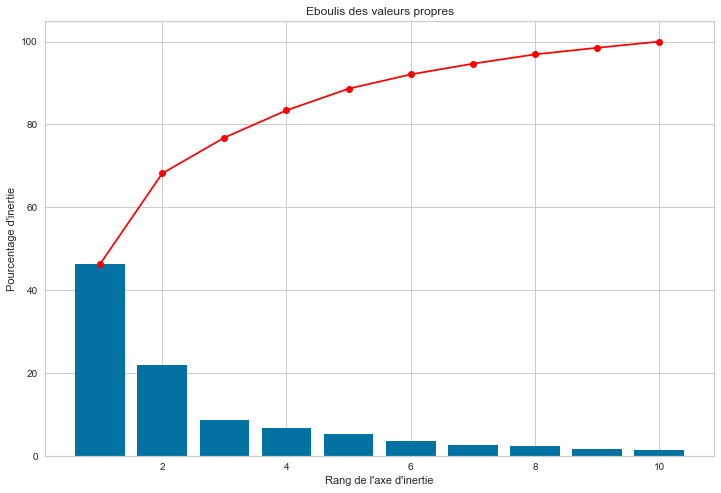

In [81]:
pca_auto(data,10)

In [ ]:
Les 6 premieres composantes expliquent mon dataset a plus de 90%

## Clustering

In [99]:
X=data.select_dtypes(include=['float64','int64'])
X_sc = StandardScaler().fit_transform(X)
pca = PCA(n_components=10).fit(X_sc)
# Projecting X on principal components
X_pca = pca.transform(X_sc)

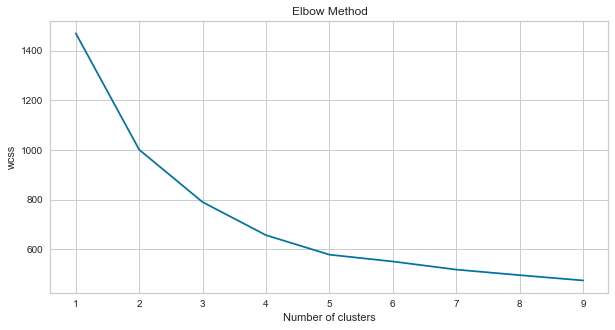

In [83]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
n=10
wcss = []
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit(X_pca)
    wcss.append(km.inertia_)
plt.plot(range(1,n),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#le nombre de cluster optimal = 4

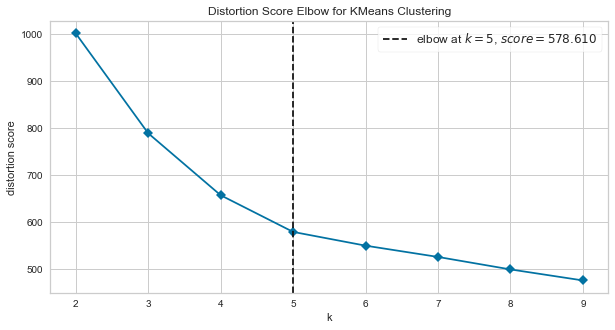

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
#D'apres la methode elbow, le nombre de cluster optimal = 5

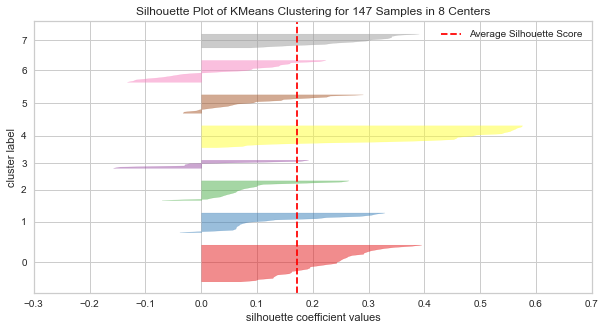

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 147 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [85]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(1,10))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#D'apres les methodes elbow et silouette, nous pouvons decider de prendre un nombre de clusters min de 5
#Cependant pour mieux detailler les propositions de segmentation, il faudra peut etre en considerer 8 (
    #avantages:permet de mieux comprendre certains details
    #inconvenients: trop de details, certains clusters se resemblent)

<AxesSubplot:ylabel='cluster'>

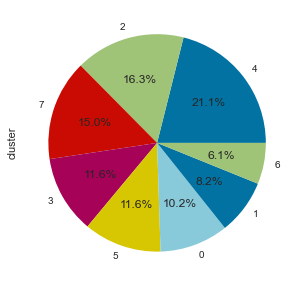

In [86]:
## KMeans Clustering with 8
from sklearn.cluster import KMeans
n_clusters=8
X['cluster'] = KMeans(n_clusters).fit(X_pca).labels_
fig, ax = plt.subplots(figsize=(5,5))
X.cluster.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [87]:
X.groupby("cluster").mean()

,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment
cluster,,,,,,,,,,
0,4.404683,8.219720,0.705258,58.333333,0.851944,0.142413,0.701551,0.743688,0.291931,0.789724
1,6.575721,9.980058,0.893820,68.750000,0.894901,0.144870,0.752612,0.793525,0.236988,0.514457
2,4.448905,7.474751,0.653502,53.837500,0.713896,0.009844,0.782678,0.646811,0.388369,0.585403
3,5.014018,9.377352,0.789134,63.817646,0.800647,-0.112627,0.768449,0.697728,0.299962,0.564991
4,6.164395,9.910759,0.877025,68.270300,0.839892,-0.107267,0.809032,0.781321,0.252485,0.356528
5,7.113787,10.733798,0.927071,72.582783,0.914243,0.169540,0.329274,0.792969,0.195380,0.642903
6,3.888474,9.075656,0.685785,58.866667,0.552211,-0.124305,0.824015,0.544319,0.413509,0.328120
7,5.393825,9.743788,0.857207,67.390910,0.634802,-0.081352,0.830809,0.590311,0.285710,0.315547


In [88]:
X.groupby("cluster").mean()/X.mean()

,ConfidenceInGovernment,Corruption,Freedom,GDP,Generosity,Happiness,Health,NegativeAffect,PositiveAffect,SocialSupport,cluster
cluster,,,,,,,,,,,
0,1.578360,0.956890,1.091125,0.883506,-18.119789,0.806656,0.908399,1.002690,1.054728,0.875744,NaN
1,1.028204,1.026536,1.146141,1.072718,-18.432424,1.204252,1.070613,0.813979,1.125409,1.109888,NaN
2,1.170000,1.067545,0.914319,0.803432,-1.252505,0.814755,0.838387,1.333924,0.917334,0.811477,NaN
3,1.129203,1.048137,1.025426,1.007936,14.329986,0.918247,0.993804,1.030275,0.989546,0.979897,NaN
4,0.712564,1.103490,1.075689,1.065269,13.648018,1.128923,1.063143,0.867205,1.108101,1.089033,NaN
5,1.284920,0.449118,1.170913,1.153735,-21.571286,1.302791,1.130299,0.671067,1.124620,1.151177,NaN
6,0.655787,1.123927,0.707243,0.975507,15.815894,0.712120,0.916704,1.420271,0.771975,0.851564,NaN
7,0.630659,1.133194,0.813021,1.047322,10.350752,0.987804,1.049448,0.981322,0.837202,1.064425,NaN


In [ ]:
#cluster 0: pays moyens(en terme de Happiness, GDP, Health)
#cluster 1: pays les plus heureux, en santé
#cluster 2: pays 
#cluster 3: pays
#cluster 4: pays
#cluster 5: pays au PIB le plus grand et les moins corrompus
#cluster 6: pays les moins heureux, au PIB le plus bas, avec le negative affect le plus eleve
#cluster 7: pays les plus confiants en leur gouvernement

In [62]:
info=(X.groupby("cluster").mean()/X.mean())

<AxesSubplot:title={'center':'Cy'}, ylabel='cluster'>

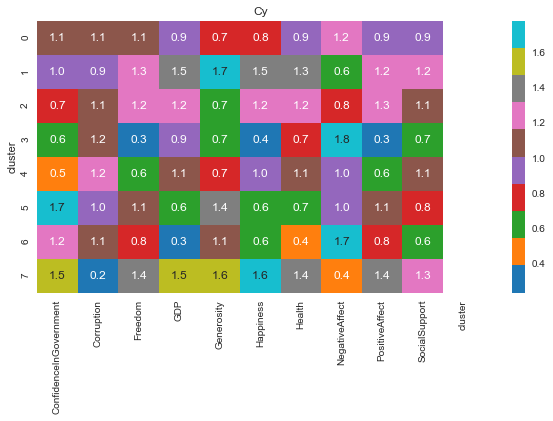

In [63]:
cmap = sns.diverging_palette(150, 5, as_cmap=True)

#Heatmap of 
from matplotlib import rcParams
plt.title('Cy')
rcParams['figure.figsize'] = (10, 5)
sns.heatmap(info, annot=True,cmap=sns.color_palette("tab10"),square=False, fmt='.1f')

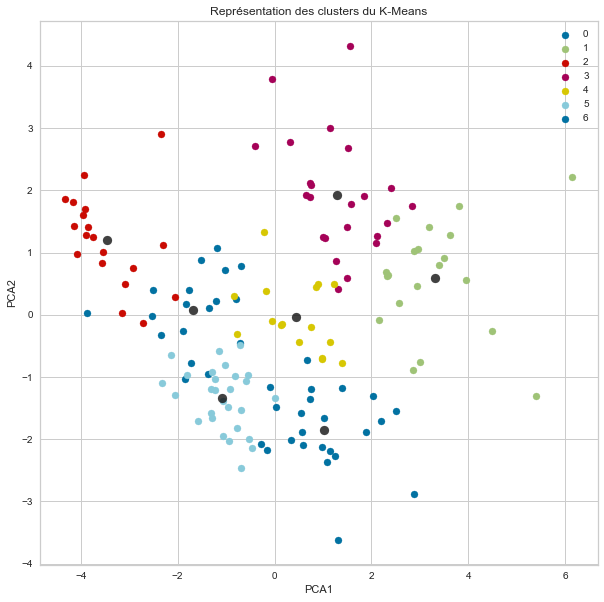

In [64]:
#https://analyticsinsights.io/le-clustering-definition-et-implementations/
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7) # on veut diviser le dataset en 7 clusters

#Prédiction
label = km.fit_predict(X_pca)
X["cluster"]=label
centroids = km.cluster_centers_
u_labels = np.unique(label)
#df['classe']=u_labels
#après on fait un group_by()

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("representation_kmeans.png")
plt.show()

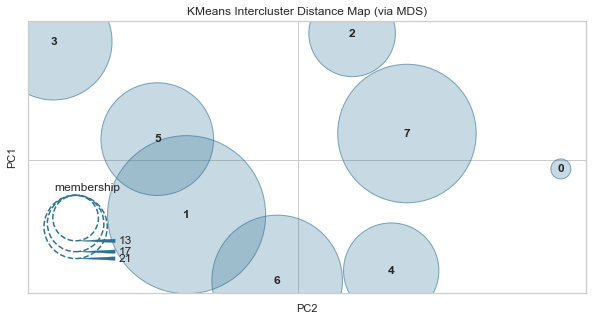

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [65]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(8)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        # vous avez le choix d'utiliser X_brut, X_standardisé, X_pca
visualizer.show()        # Finalize and render the figure

### Détection d'anomalies avec isolation-forest

In [102]:
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py
#détection d'anomalies pour la détection des valeurs aberrantes sur les jeux de données
#https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2#specify the 12 metrics column names to be modelled
#
from sklearn.ensemble import IsolationForest
data=X.drop(columns="cluster")
#data.head()
data['anomaly'] = IsolationForest(contamination='auto'.fit(data).predict(data)
#ici je demande au modele d'IA (isolation forest) qui trouve les 5%(0.01) des pays qui sont tres extremes

#Find the number of anomalies and normal points here points classified -1 are anomalous
data['anomaly'].value_counts()

SyntaxError: invalid syntax (<ipython-input-102-2c8c5a7027b4>, line 12)

In [49]:
outliers=data.loc[data['anomaly']==-1]
outliers=outliers.drop(columns="anomaly")
outliers.to_csv('WorldHappiness_outliers.csv')

In [50]:
data.groupby("anomaly").mean()/data.mean()

,ConfidenceInGovernment,Corruption,Freedom,GDP,Generosity,Happiness,Health,NegativeAffect,PositiveAffect,SocialSupport,anomaly
anomaly,,,,,,,,,,,
-1,1.467741,0.718144,0.942387,0.874786,-8.890604,0.946295,0.939035,0.909555,1.007633,0.980882,NaN
1,0.992394,1.004583,1.000937,1.002036,1.160823,1.000873,1.000991,1.001471,0.999876,1.000311,NaN


In [51]:
data_without_outliers=data.loc[data['anomaly']==1]
data_without_outliers=data_without_outliers.drop(columns="anomaly")
data_without_outliers.to_csv("WorldHappiness_without_anomalies.csv")

In [52]:
data_without_outliers.head()

,Happiness,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect,ConfidenceInGovernment
2,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738
4,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430
5,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901
6,7.257038,10.706581,0.949958,73.300003,0.910550,0.308773,0.411347,0.780079,0.225361,0.453407
7,7.293728,10.724075,0.906218,72.699997,0.890031,0.131114,0.518304,0.747569,0.180269,0.435908


In [54]:
def reporting(df):
#https://github.com/pandas-profiling/pandas-profiling
#Exploratory Data Analysis 
#https://www.datacorner.fr/pandas-profiling/

    from pandas_profiling import ProfileReport
    resultats = df.profile_report(title='Pandas Profiling Report')
    resultats.to_file("report_of_clean_data.html")
    return None
reporting(data_without_outliers)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]